# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$\nabla_w(L(w)) = \nabla_w\left(\frac{1}{N}\sum_{i=1}^N{(x_iw - y_i)^2} + \frac{1}{C}\sum_{j=1}^D{w_j^2}\right) = \frac{2}{N}\sum_{i=1}^N{(x_iw - y_i)x_i^T} + \frac{2}{C}w$$

$$w_{new} = w_{old} - \alpha\nabla_w(L(w)) = w_{old} - \alpha\left(\frac{2}{n}\sum_{i=1}^n{(x_iw_{old}-y_i)x_i^T} + \frac{2}{C}w_{old}\right)$$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$\nabla_w\left(L(w)\right) = \nabla_w\left(-\frac{1}{N}\sum_{i=1}^N{\left[y_i\log{\frac{1}{1 + e^{-x_iw}}} + (1 - y_i)\log{\frac{e^{-x_iw}}{1 + e^{-x_iw}}}\right]} + \frac{1}{C}\sum_{j=1}^D{w_j^2}\right) = $$
$$ = \nabla_w\left(\frac{1}{N}\sum_{i=1}^N{\left[y_i\log{(1 + e^{-x_iw})} + (1 - y_i)\log{(1 + e^{x_iw})}\right]} + \frac{1}{C}w^Tw\right) = $$
$$ = \frac{1}{N}\sum_{i=1}^N{\left[y_i\frac{-x_i^T}{1 + e^{x_iw}} + (1 - y_i)x_i^T\frac{e^{x_iw}}{1 + e^{x_iw}}\right]} + \frac{2}{C}w =$$
$$ = \frac{1}{N}\sum_{i=1}^N\left[\frac{1}{1 + e^{-x_iw}} - y_i\right]x_i^T + \frac{2}{C}w = \frac{1}{N}\sum_{i=1}^N\left[\sigma(x_iw) - y_i\right]x_i^T + \frac{2}{C}w$$

$$ w_{new} = w_{old} - \alpha\nabla_w(L(w)) =  w_{old} - \alpha\left[\frac{1}{n}\sum_{i=1}^n\left[\sigma(x_iw_{old}) - y_i\right]x_i^T + \frac{2}{C}w_{old}\right]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
* $$\nabla_w(Q(w)) = 2 X^T X w - 2 X^T y $$

$$\nabla_w(\nabla_w(Q(w))) = 2 X^T X $$

По определению, матрица $A$ положительно определена, если $ \forall x \neq \theta \langle Ax, x \rangle > 0 => x^TAx > 0 $
$ \newline$ Пусть $y$ - произвольный веткор $\neq \theta => y^T X^T X y = (X y)^T (X y) = \langle Xy, Xy \rangle \geqslant 0 \langle Xy, Xy \rangle = 0 <=> Xy \equiv \theta$ т.к. $ y \neq \theta => $ столбцы $X$ линейно зависимы $=> X$ т.к. строк больше чем столбцов, матрица $X$ не может иметь полный ранг. Приходим к противоречию.
Значит, $\langle Xy, Xy \rangle > 0$ и в силу произвольного выбора вектора $y$ матрица $X^T X$ положительно определена. А из этого следует, что $w = (X^TX)^{-1}X^TY $ является минимумом $Q(w)$


* $$\nabla_w(L(w)) = \nabla_w\left(\frac{1}{N}\sum_{i=1}^N(x_iw - y_i)^2 + \frac{1}{C}\sum_{i=1}^D{w^2}\right)= $$ 
$$ = \nabla_w\left(\frac{1}{N}(Xw - y)^T (Xw - y) + \frac{1}{C}w^T w\right) = $$
$$ = \frac{1}{N}\nabla_w\left(w^T X^T X w - y^T X w - w^T X^T y + y^T y\right) + \frac{1}{C}\nabla_w\left(w^T w\right) = $$
$$ = \frac{2}{N}X^T X w - \frac{2}{N} X^T y + \frac{2}{C}w = 0 $$

$$ \left(X^T X + \frac{N}{C}I\right)w = X^T y $$

Покажем, что матрица $ \left(X^T X + \frac{N}{C}I\right) $ положительно определена:
$\newline$По определению, матрица $A$ положительно определена, если $ \forall x \neq \theta \langle Ax, x \rangle > 0 => x^TAx > 0 $
$ \newline$ Пусть $y$ - произвольный веткор $\neq \theta => y^T\left(X^T X + \frac{N}{C}I\right) y = 
y^TX^T X y + \frac{N}{C} y^T y = \langle Xy, Xy \rangle + \frac{N}{C} y^2 > 0 $ т.к. 
$$ \langle Xy, Xy \rangle \geqslant 0$$
$$ y \neq \theta => y^2 > 0 $$
Матрица $ \left(X^T X + \frac{N}{C}I\right) $ положительно определена. Из положительной определенности матрицы следует (по критерию Сильвестра), что все ее главные диагональные миноры положительны. Матрица невырождена, а значит обратима.

Точное решение:
$$ w = \left(X^T X + \frac{N}{C}I\right)^{-1} X^T y $$

Докажем, что это минимум:
$ \nabla_w(\nabla_w(L(w))) = \nabla_w\left((\frac{2}{N}X^T X + \frac{2}{C}I)w - \frac{2}{N} X^T y\right) = \frac{2}{N} X^T X + \frac{2}{C}I $

Как уже было показано ранее, такая матрица является положительно определенной, значит найденное решение является точкой минимума $L(w)$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$ E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i))$$

$$ p_i = p(y_i = 1 | x_i) $$
$$ a_i = a(x_i) $$

$$ E(L | x_i) = p_i \log(1 - a_i) - p_i \log a_i - \log(1 - a_i) = p_i \log\left(\frac{1 - a_i}{a_i}\right) - \log(1 - a_i) = f(a_i)$$

Найдем минимум этой функции
$$ f_{a_i}' = -\frac{p_i}{(1 - a_i)a_i} + \frac{1}{1 - a_i} = 0 =>  a_i = p_i $$

При $ a_i < p_i $

$$ f_{a_i}' = \frac{a_i - p_i}{(1 - a_i)a_i} < 0 $$ т.к. $ 0 < a_i < 1 $

При $ a_i \geqslant p_i $

$$ f_{a_i}' = \frac{a_i - p_i}{(1 - a_i)a_i} \geqslant 0 $$ т.к. $ 0 < a_i < 1 $

Значит $ a(x_i) = p(y_i = 1 | x_i) $ точка минимума E(L | x_i)

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, так как мы вводим его, чтобы сместить целевую переменную от нуля. Это смещение не должно штрафоваться

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [55]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [56]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [57]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [58]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [59]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    indices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(indices)
    res_idx = None
    r = X.shape[0] % batch_size
    if r:
        rest_idx = indices[-r:]
        indices = indices[:-r:]
    batches = indices.reshape(-1, batch_size)
    for i in batches:
        ones = np.ones(batch_size)[:, np.newaxis]
        X_batch = np.hstack((ones,X[i]))
        y_batch = y[i]
        yield (X_batch, y_batch)
    if r:
        ones = np.ones(r)[:, np.newaxis]
        X_batch = np.hstack((ones,X[rest_idx]))
        y_batch = y[rest_idx]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [60]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    sigm_value_x = 1. / (1. + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        R = (np.sum(self.weights ** 2) - self.weights[0] ** 2) / self.C
        if self.model_type == 'lin_reg':
            loss = np.mean((np.dot(X_batch, self.weights) - (y_batch - 0.5) * 2) ** 2)
        else:
            xw = np.dot(X_batch, self.weights)
            loss = -np.mean(y_batch * np.log(sigmoid(xw)) + (1 - y_batch) * np.log(1 - sigmoid(xw)))
        loss += R
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        R_grad = 2. * self.weights / self.C
        R_grad[0] = 0
        if self.model_type == 'lin_reg':
            loss_grad = np.mean(X_batch * (np.dot(X_batch, self.weights) - (y_batch - 0.5) * 2)[:, np.newaxis], axis=0)
        else:
            xw = np.dot(X_batch, self.weights)
            loss_grad = np.mean(X_batch * (sigmoid(xw) - y_batch)[:, np.newaxis], axis=0)
        loss_grad += R_grad
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        pass
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.sample(X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(np.array(X), np.array(y), shuffle=True, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        ones = np.ones(X.shape[0])[:, np.newaxis]
        y_hat = np.dot(np.hstack((ones, X)), self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [61]:
def plot_decision_boundary(clf, color):
    ## Your code Here
    
    # a*y + b*x + c = 0
    
    a = clf.weights[2]
    b = clf.weights[1]
    c = clf.weights[0]
    x = np.asarray([-1., 6.])
    y = (- x * b - c) / a
    plt.plot(x, y, color=color, label=clf.model_type)

Веса для линейной регрессии:  [-1.2407907   0.28908588 -0.33426171]
Веса для логистической регрессии:  [-4.87114844  1.08290428 -1.11015909]


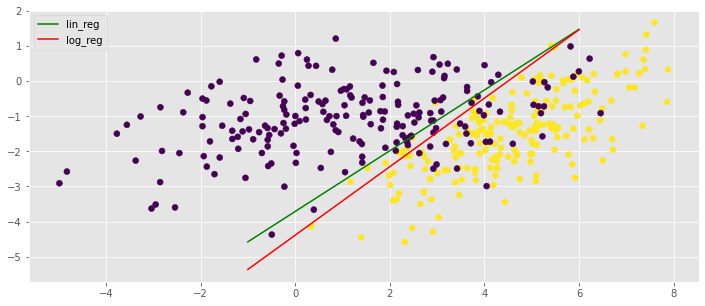

In [62]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf_lin = MySGDClassifier(batch_generator, C=100, model_type='lin_reg', max_epoch=1000)
my_clf_lin.fit(X, y, batch_size=20)
print('Веса для линейной регрессии: ', my_clf_lin.weights)
plot_decision_boundary(my_clf_lin, 'g')

my_clf_log = MySGDClassifier(batch_generator, C=100, model_type='log_reg', max_epoch=1000)

my_clf_log.fit(X, y, batch_size=20)
print('Веса для логистической регрессии: ', my_clf_log.weights)
plot_decision_boundary(my_clf_log, 'r')


plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [63]:
from sklearn.datasets import make_classification

In [64]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

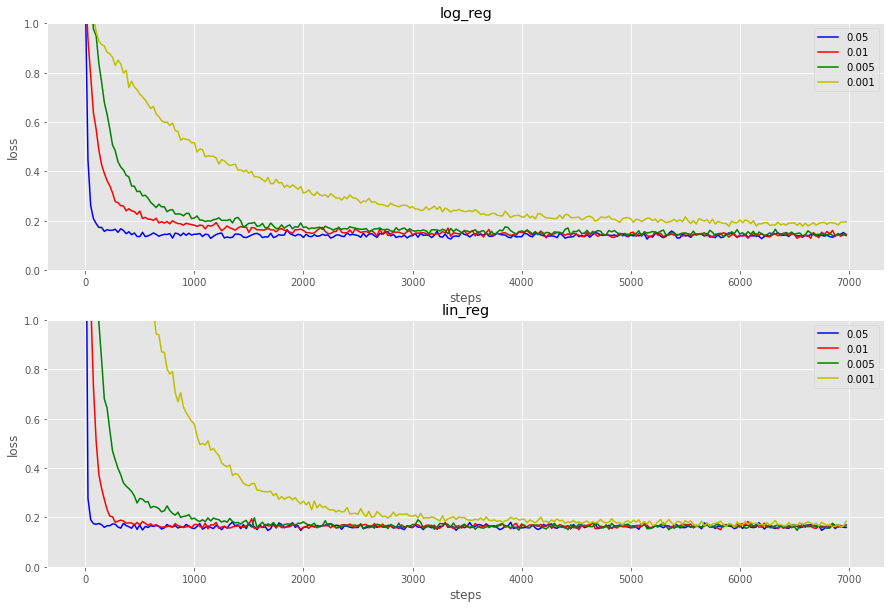

In [65]:
## Your Code Here
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

alphas = [0.05, 0.01, 0.005, 0.001]
N = 25
batch_size = 100
log_loss_mean = []
lin_loss_mean = []

for alpha in alphas:
    my_clf_log = MySGDClassifier(batch_generator, C=100, model_type='log_reg', max_epoch=7, alpha=alpha)
    my_clf_log.fit(X, y, batch_size=batch_size)
    loss = np.array(my_clf_log.errors_log['loss'])
    loss = loss.reshape(-1, N)
    log_loss_mean.append(loss.mean(axis=1))
    
for alpha in alphas:
    my_clf_lin = MySGDClassifier(batch_generator, C=100, model_type='lin_reg', max_epoch=7, alpha=alpha)
    my_clf_lin.fit(X, y, batch_size=batch_size)
    loss = np.array(my_clf_lin.errors_log['loss'])
    loss = loss.reshape(-1, N)
    lin_loss_mean.append(loss.mean(axis=1))

colors = ['b', 'r', 'g', 'y']
for i, values in enumerate(log_loss_mean):
    ax1.plot(np.arange(values.shape[0]) * N, values, color=colors[i], label=alphas[i])
    
for i, values in enumerate(lin_loss_mean):
    ax2.plot(np.arange(values.shape[0]) * N, values, color=colors[i], label=alphas[i])

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax1.set_ylabel('loss')
ax2.set_ylabel('loss')
ax1.set_xlabel('steps')
ax2.set_xlabel('steps')
ax1.set_title('log_reg')
ax2.set_title('lin_reg')
ax1.legend()
ax2.legend()


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

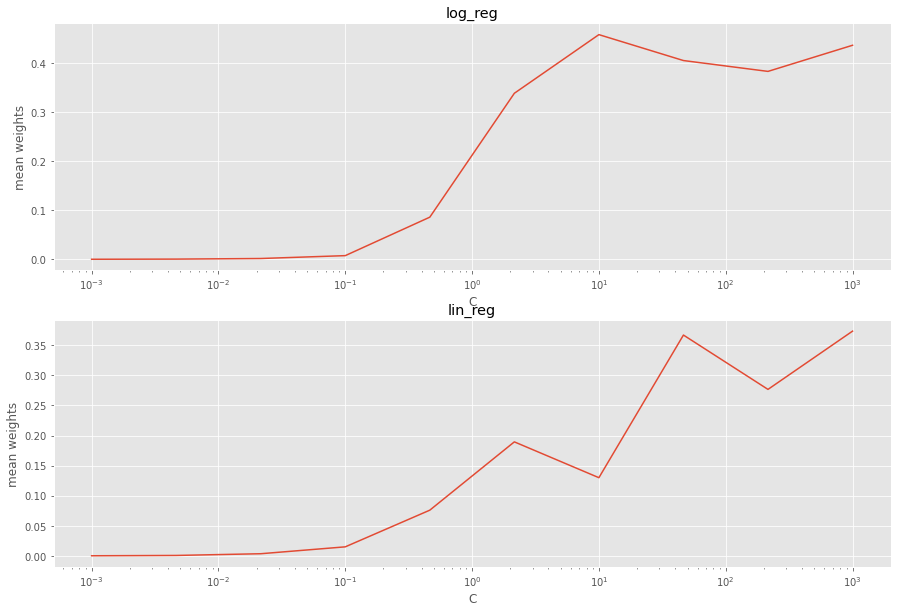

In [66]:
## Your Code Here
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_ylabel('mean weights')
ax2.set_ylabel('mean weights')
ax1.set_xlabel('C')
ax2.set_xlabel('C')
ax1.set_title('log_reg')
ax2.set_title('lin_reg')
fig.set_figheight(10)
fig.set_figwidth(15)

batch_size = 500
log_weights_mean = []
lin_weights_mean = []
c_values = np.logspace(3, -3, 10)

for C in c_values:
    my_clf_log = MySGDClassifier(batch_generator, C=C, model_type='log_reg', max_epoch=20, alpha=0.0001)
    my_clf_log.fit(X, y, batch_size=batch_size)
    log_weights_mean.append(np.mean(np.abs(my_clf_log.weights[1:])))
    
for C in c_values:
    my_clf_lin = MySGDClassifier(batch_generator, C=C, model_type='lin_reg', max_epoch=20, alpha=0.0001)
    my_clf_lin.fit(X, y, batch_size=batch_size)
    lin_weights_mean.append(np.mean(np.abs(my_clf_lin.weights[1:])))
    
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.plot(c_values, log_weights_mean)
ax2.plot(c_values, lin_weights_mean)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [67]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [68]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [69]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [70]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [72]:
from sklearn.model_selection import KFold

def groups_kfold(groups, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True)
    group_names = np.unique(groups)
    for (idx_test, idx_val) in kf.split(group_names):
        yield group_names[idx_test], group_names[idx_val]

def validate(clf, X, y, groups, threshold, batch_size):
    scores = []
    for (names_train, names_val) in groups_kfold(groups, 10):
        X_train = []
        y_train = []
        for name in names_train:
            X_train.append(X[groups == name][0])
            y_train.append(y[groups == name][0])
        X_val = []
        y_val = []
        for name in names_val:
            X_val.append(X[groups == name][0])
            y_val.append(y[groups == name][0])
        clf.fit(np.asarray(X_train), np.asarray(y_train), batch_size)
        y_pred = clf.predict(np.asarray(X_val))
        #print(np.unique((y_pred > threshold).astype(int), return_counts=True))
        scores.append(f1_score(np.asarray(y_val), (y_pred > threshold).astype(int)))
    return np.mean(scores)

In [73]:
batch_size = 10
my_clf_lin = MySGDClassifier(batch_generator, C=1, model_type='lin_reg', max_epoch=40, alpha=0.00001)
lin_score = validate(my_clf_lin, X_train, y_train, groups_train, 0., batch_size)
lin_score

0.6096092796092796

In [74]:
batch_size = 10
my_clf_log = MySGDClassifier(batch_generator, C=0.1, model_type='log_reg', max_epoch=10, alpha=0.1)
log_score = validate(my_clf_log, X_train, y_train, groups_train, 0.3, batch_size)
log_score

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

0.6003463203463204

In [75]:
scores = []
thresholds = np.linspace(0.35, 0.65, 10)
for i in thresholds:
    my_clf_log = MySGDClassifier(batch_generator, C=10, model_type='log_reg', max_epoch=10, alpha=0.1)
    scores.append(validate(my_clf_log, X_train, y_train, groups_train, i, batch_size))
scores

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

[0.5413003663003663,
 0.5678860028860029,
 0.44477078477078474,
 0.37454212454212454,
 0.40073260073260075,
 0.44985569985569984,
 0.439047619047619,
 0.40428571428571425,
 0.38380952380952377,
 0.32333333333333336]

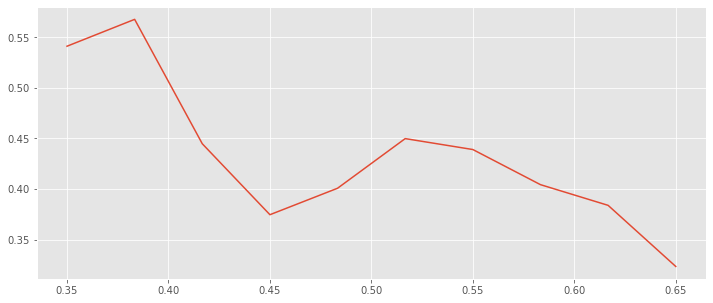

In [76]:
plt.plot(thresholds, scores)

In [77]:
batch_size = 10

c_values = np.logspace(2, -2, 10)
alphas = [0.5, 0.1, 0.05]
max_epochs = (np.arange(4) + 1) * 5
thresholds = np.linspace(0.35, 0.65, 10)

best_score = 0.
best_c = 0
best_alpha = 0
best_epochs = 0
best_threshold = 0.5

for C in c_values:
    for alpha in alphas:
        for max_epoch in max_epochs:
            for threshold in thresholds:
                clf = MySGDClassifier(batch_generator,
                                             C=C,
                                             model_type='log_reg',
                                             max_epoch=max_epoch,
                                             alpha=alpha)
                score = validate(clf, X_train, y_train, groups_train, threshold, batch_size)
                if score > best_score:
                    best_score = score
                    best_c = C
                    best_alpha = alpha
                    best_epochs = max_epoch
                    best_threshold = threshold
coefs = (best_c, best_alpha, best_epochs, best_threshold)
coefs

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encoun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis,

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sp

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphe

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in subtract
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumer

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphe

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphe

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphe

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphe

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/l

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in subtract
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py3

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py3

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_laun

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square


(0.01, 0.1, 5, 0.3833333333333333)

In [78]:
best_score

0.6651803751803753

In [79]:
batch_size = 10

c_values = np.logspace(2, -2, 10)
alphas = [0.5, 0.1, 0.05]
max_epochs = (np.arange(4) + 1) * 5
thresholds = np.linspace(0.35, 0.65, 10)

best_score = 0.
best_c = 0
best_alpha = 0
best_epochs = 0
best_threshold = 0.5

for C in c_values:
    for alpha in alphas:
        for max_epoch in max_epochs:
            for threshold in thresholds:
                clf = MySGDClassifier(batch_generator,
                                             C=C,
                                             model_type='lin_reg',
                                             max_epoch=max_epoch,
                                             alpha=alpha)
                score = validate(clf, X_train, y_train, groups_train, threshold, batch_size)
                if score > best_score:
                    best_score = score
                    best_c = C
                    best_alpha = alpha
                    best_epochs = max_epoch
                    best_threshold = threshold
lin_coefs = (best_c, best_alpha, best_epochs, best_threshold)
lin_coefs

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in re

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeri

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/hom

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: Runt

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/n

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/c

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: R

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_l

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykern

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encounter

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered 

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encount

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/s

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_meth

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered 

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered 

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/cor

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/mi

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launc

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_l

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/l

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipyk

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launch

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered 

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/nump

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fr

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_lau

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/n

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/i

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/ilya/miniconda3/env

(0.07742636826811278, 0.5, 15, 0.5166666666666666)

In [80]:
best_score

0.6634920634920635

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [81]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
    
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [82]:
C = 0.1
alpha = 0.1
max_epoch = 10
threshold = 0.3

In [83]:
X_test = scaler.transform(X_test)

model = MySGDClassifier(batch_generator, C=C, model_type='log_reg', max_epoch=max_epoch, alpha=alpha)
model.fit(X_train, y_train, batch_size=10)
y_pred = model.predict(X_test)

/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/home/ilya/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [84]:
df = pd.DataFrame({'pair_id': test_data['pair_id'],
                   'target': (y_pred > threshold).astype(int)})
df = df.set_index(['pair_id'])
df.to_csv('first_try_log')

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

**Ilya Alkisev**

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***